In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print('平均值',data[a].mean())
    print('方差',data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['入店人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['入店人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['入店人数'] >a) & (data['入店人数'] < b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['入店人数'].values.reshape(-1,1)
    jindian = data_min['下单人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data,list__):
    list_ = list__
    x = 0
    s = ['max','one','two','min']
    for i in list_:
        df = data[data['cluster'] == i]
        print( s[x] +'-分类:' + str(df['cluster'].count()))    
        x = x+1


In [3]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚月季度数据/7月份数据/2data/门店数据(D).csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
# data.describe()

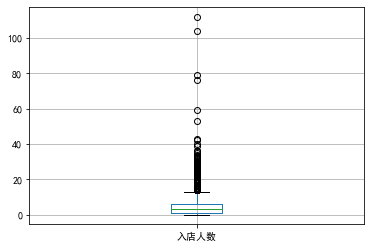

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
data.boxplot('入店人数')

In [6]:
a = data['入店人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 3.0
平均: 4.467516189680384
--------------
50% : 3.0
75% : 6.0
100%: 13.5
max : 112.0
--------------
3.0
6.0
13.5


In [7]:
print('min：')
line_bg_rd(q04,q1)
print('#####################')
print('two：')
line_bg_rd(q1,q2)
print('#####################')
print('one：')
line_bg_rd(q2,q3)
print('#####################')
print('max：')
line_bg_rd(q3,q04)

min：
数据分集查看
X训练 (1621, 1)
y训练 (1621, 1)
X测试 (541, 1)
y测试 (541, 1)
-------------
线性结截距: [-0.0050375]
回归系数 [[0.05026068]]
RMSE: 0.20908993349589144
#####################
two：
数据分集查看
X训练 (579, 1)
y训练 (579, 1)
X测试 (194, 1)
y测试 (194, 1)
-------------
线性结截距: [-0.24176465]
回归系数 [[0.13361189]]
RMSE: 0.5420270801209744
#####################
one：
数据分集查看
X训练 (545, 1)
y训练 (545, 1)
X测试 (182, 1)
y测试 (182, 1)
-------------
线性结截距: [-0.01159605]
回归系数 [[0.085445]]
RMSE: 0.9460823362839084
#####################
max：
数据分集查看
X训练 (204, 1)
y训练 (204, 1)
X测试 (69, 1)
y测试 (69, 1)
-------------
线性结截距: [1.02605637]
回归系数 [[0.01895232]]
RMSE: 1.380727607422065


In [8]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)

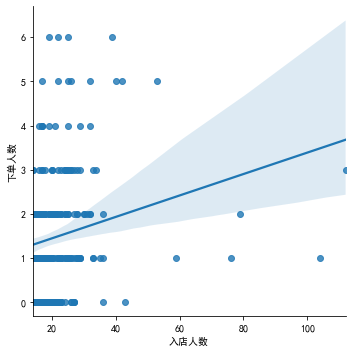

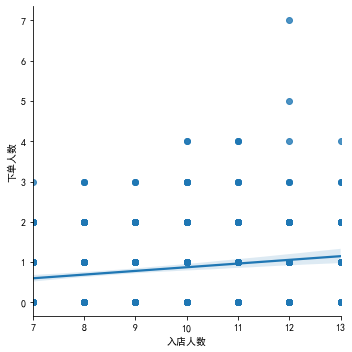

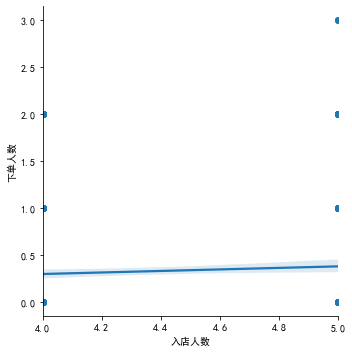

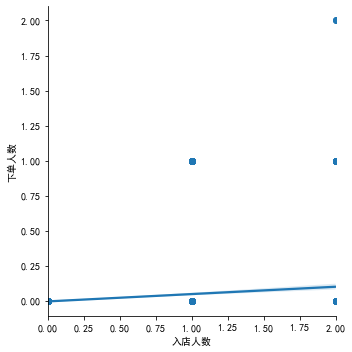

In [9]:
sns.lmplot(x="入店人数", y="下单人数",data=data_max,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_one,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_two,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_min,fit_reg=True)

In [10]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

37
107
160
165
